In [1]:
import numpy as np
import pandas as pd
from sklearn import manifold
from matplotlib import pyplot as plt 

In [2]:
data = pd.read_csv('./Data/dishes.csv',sep=";")
data.head()

,UserName,Dish,Score
0,thomahur,Pizza Napolitana,5
1,thomahur,Pizza Margherita,3
2,thomahur,Pasta Bolognese,2
3,thomahur,Pasta Carbonara,5
4,thomahur,Chicken Curry,4


In [3]:
mean = data.groupby(['Dish']).mean()

<AxesSubplot:xlabel='Dish'>

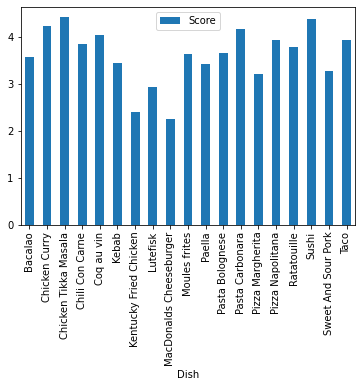

In [4]:
mean.plot.bar()

In [5]:
data = data.pivot_table(index='UserName', values='Score', columns='Dish')
data.head()

Dish,Bacalao,Chicken Curry,Chicken Tikka Masala,Chili Con Carne,Coq au vin,Kebab,Kentucky Fried Chicken,Lutefisk,MacDonalds Cheeseburger,Moules frites,Paella,Pasta Bolognese,Pasta Carbonara,Pizza Margherita,Pizza Napolitana,Ratatouille,Sushi,Sweet And Sour Pork,Taco
UserName,,,,,,,,,,,,,,,,,,,
anitamv,3.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,1.0,5.0,5.0,5.0,4.0,4.0,3.0,4.0,4.0
annedah,5.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,3.0,5.0,5.0,5.0,4.0,2.0,2.0,4.0,6.0,3.0,2.0
bgulbra,5.0,6.0,6.0,5.0,3.0,5.0,1.0,1.0,1.0,1.0,3.0,2.0,4.0,2.0,3.0,5.0,6.0,3.0,3.0
eddiebo,5.0,4.0,3.0,3.0,5.0,4.0,4.0,1.0,3.0,3.0,5.0,3.0,5.0,4.0,5.0,4.0,5.0,3.0,5.0
edw,6.0,5.0,4.0,3.0,5.0,1.0,2.0,6.0,1.0,6.0,3.0,2.0,6.0,1.0,1.0,4.0,3.0,2.0,2.0


In [6]:
data = data.T
distance = lambda column1, column2: np.linalg.norm((column1 - column2).fillna(0))
distances = data.apply(lambda column2: data.apply(lambda column1: distance(column1, column2)))
distances.head()

UserName,anitamv,annedah,bgulbra,eddiebo,edw,espenlil,evend,finnks,georgsv,glenngr,...,thomahur,timonn,timz,toralfsk,torem,tovestod,turidsch,vseder,xsu,zabin
UserName,,,,,,,,,,,,,,,,,,,,,
anitamv,0.000000,9.327379,8.306624,6.000000,10.049876,6.244998,6.403124,4.582576,6.708204,10.583005,...,6.480741,5.000000,5.567764,9.433981,7.348469,8.366600,6.082763,3.872983,8.185353,8.185353
annedah,9.327379,0.000000,9.695360,7.937254,9.380832,9.591663,10.099505,6.782330,8.485281,8.774964,...,10.535654,10.862780,11.401754,9.899495,7.681146,8.062258,8.062258,10.198039,5.830952,9.591663
bgulbra,8.306624,9.695360,0.000000,7.681146,10.099505,8.124038,7.615773,7.141428,9.165151,7.211103,...,7.280110,8.660254,9.433981,9.797959,6.708204,6.708204,5.656854,8.774964,7.211103,8.717798
eddiebo,6.000000,7.937254,7.681146,0.000000,9.949874,7.937254,6.403124,4.000000,7.348469,10.344080,...,7.615773,6.782330,6.480741,9.848858,7.681146,6.782330,5.916080,7.071068,5.916080,8.660254
edw,10.049876,9.380832,10.099505,9.949874,0.000000,10.488088,9.695360,7.483315,10.677078,6.855655,...,10.344080,9.695360,12.165525,8.717798,7.416198,8.426150,8.306624,11.269428,8.124038,9.380832


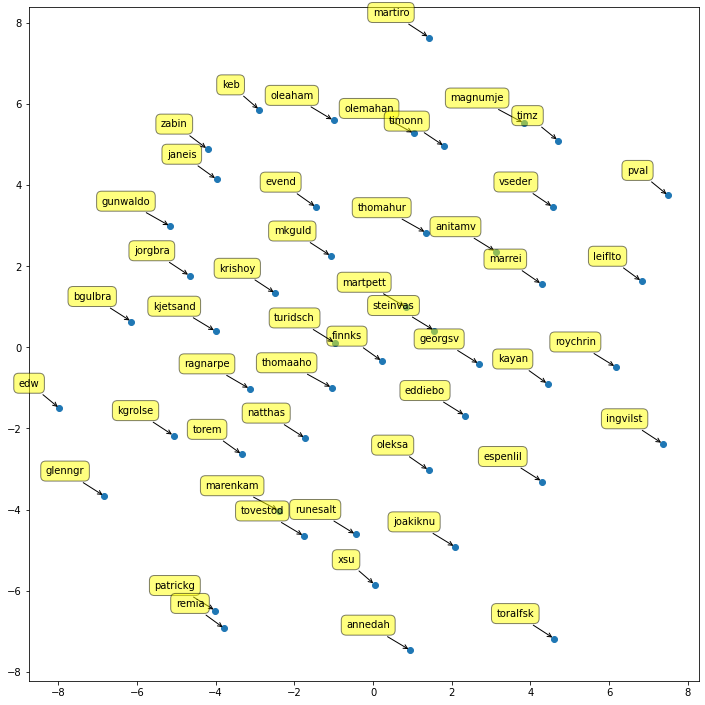

In [15]:
# Make 2-dimensional projection of distances between users
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=6)
results = mds.fit(distances)
coords = results.embedding_
plt.rcParams['figure.figsize'] = [12, 12]

# Plot points as circles
plt.subplots_adjust(bottom = 0.1)
plt.scatter(coords[:, 0], coords[:, 1], marker = 'o')

# Plot 'User' labels
for label, x, y in zip(data.columns.values, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()


In [20]:
# Find nearest neighbors by orderering by distance from "me"
me = 'thomahur' # Assume 'Frank' needs new recommendations
neighbors = distances[me].drop(me, axis=0) # Remove "me" from neighbors

# Use only k-nearest neighbors
k = 5
orderedNeighbors = neighbors.sort_values() # Sort. Nearest neighbor first.
nearestNeighbors = orderedNeighbors[0:k] # Select the k first entries
print("My nearest neighbors:")
print(nearestNeighbors)

My nearest neighbors:
UserName
mkguld      5.000000
turidsch    5.385165
martpett    5.385165
finnks      5.567764
torem       5.830952
Name: thomahur, dtype: float64
